## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [6]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [7]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [8]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [9]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [10]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [11]:
target = 'survived'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   cabin     295 non-null    object 
 8   embarked  1307 non-null   object 
 9   title     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [16]:
vars_num = [var for var in data.columns if data[var].dtype != 'O']

vars_cat = [var for var in data.columns if data[var].dtype == 'O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


In [17]:
vars_num

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']

In [18]:
data.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked', 'title'],
      dtype='object')

### Find missing values in variables

In [20]:
# first in numerical variables

vars_num_with_na = [var for var in vars_num if data[var].isnull().sum() > 0]
vars_num_with_na

['age', 'fare']

In [21]:
data[vars_num_with_na].isnull().mean().sort_values(ascending=False)

age     0.200917
fare    0.000764
dtype: float64

In [22]:
# now in categorical variables

vars_cat_with_na = [var for var in vars_cat if data[var].isnull().sum() > 0]
vars_cat_with_na

['cabin', 'embarked']

In [23]:
data[vars_cat_with_na].isnull().mean().sort_values(ascending=False)

cabin       0.774637
embarked    0.001528
dtype: float64

In [24]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
vars_with_na

['age', 'fare', 'cabin', 'embarked']

In [25]:
data[vars_with_na].isnull().mean().sort_values(ascending=False)

cabin       0.774637
age         0.200917
embarked    0.001528
fare        0.000764
dtype: float64

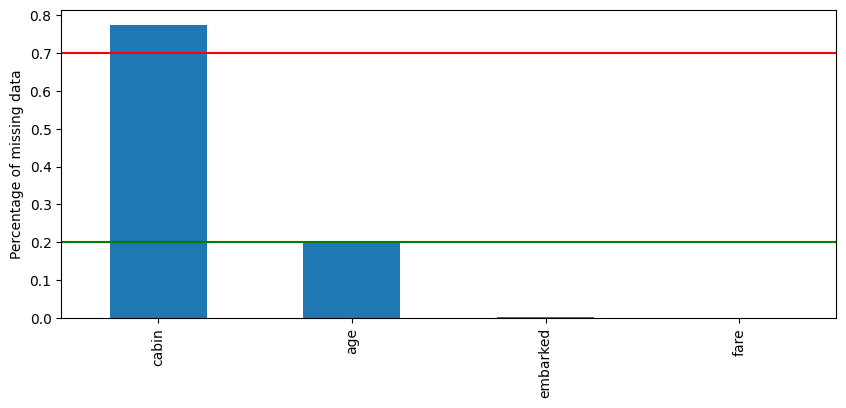

In [26]:
# plot

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.7, color='r', linestyle='-')
plt.axhline(y=0.20, color='g', linestyle='-')

plt.show()

From the graph we can see that the cabin column has the highest number of missing data, followed by age.

### Determine cardinality of categorical variables

Cardinality refers to the distinct values a specific variables has

<Axes: >

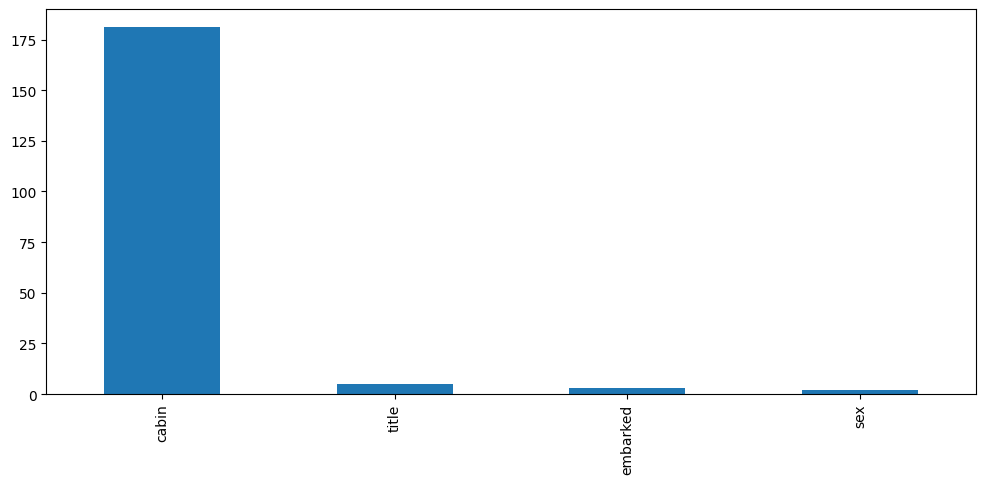

In [38]:
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [39]:
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Cardinality of numerical variables

<Axes: >

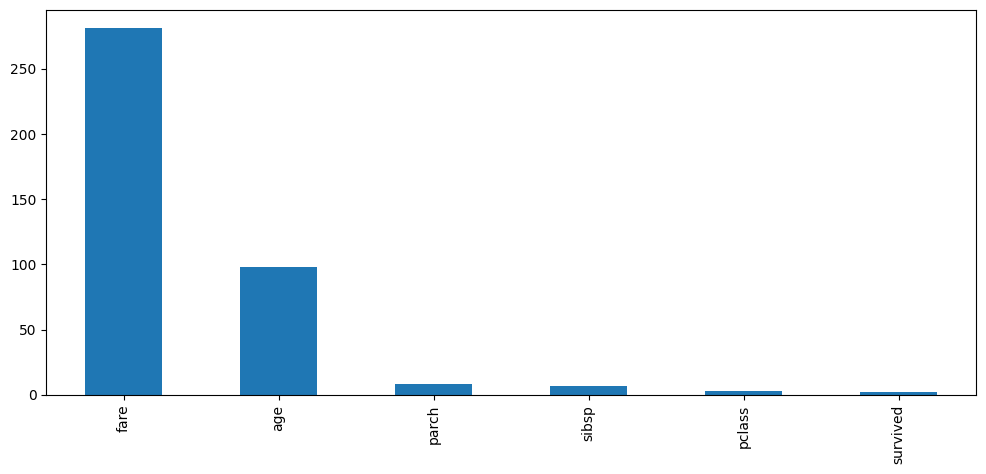

In [42]:
data[vars_num].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

### Determine the distribution of numerical variables

In [44]:
data.head(1)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0,0,0,211.3375,B5,S,Miss


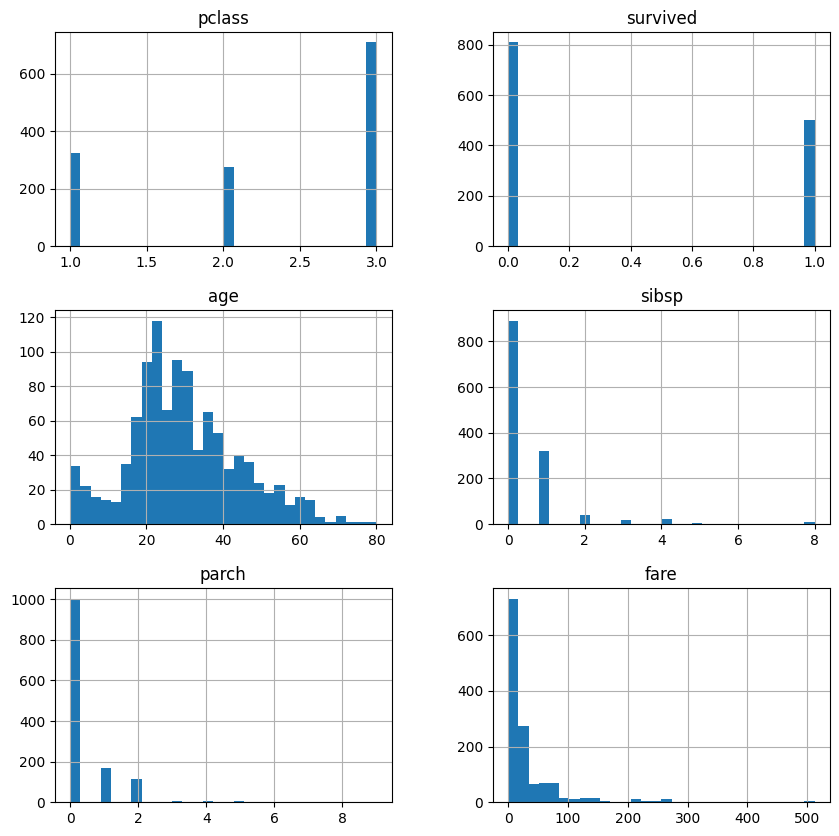

In [43]:
data[vars_num].hist(bins=30, figsize=(10,10))
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [135]:
X_train['cabin'] = X_train['cabin'].str.extract(r'([A-Za-z]+)', expand=False)
X_test['cabin'] = X_test['cabin'].str.extract(r'([A-Za-z]+)', expand=False)

In [136]:
X_test['cabin'].value_counts(dropna=False)

cabin
NaN    211
C       16
B       13
D       10
E        5
A        3
F        3
G        1
Name: count, dtype: int64

In [137]:
X_train['cabin'].value_counts(dropna=False)

cabin
NaN    803
C       78
B       52
E       36
D       36
A       19
F       18
G        4
T        1
Name: count, dtype: int64

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [138]:
vars_num_with_na

['age', 'fare']

In [139]:
for var in vars_num_with_na:
    X_train[var+'NA'] = np.where(X_train[var].isna(), 1, 0)
    X_train[var] = X_train[var].fillna(X_train[var].median())

    X_test[var+'NA'] = np.where(X_test[var].isna(), 1, 0)
    X_test[var] = X_test[var].fillna(X_train[var].median())

In [140]:
X_train[vars_num_with_na].isna().sum()

age     0
fare    0
dtype: int64

In [141]:
X_test[vars_num_with_na].isna().sum()

age     0
fare    0
dtype: int64

### Replace Missing data in categorical variables with the string **Missing**

In [142]:
X_train[vars_cat_with_na] = X_train[vars_cat_with_na].fillna('Missing')
X_test[vars_cat_with_na] = X_test[vars_cat_with_na].fillna('Missing')

In [143]:
X_train[vars_cat_with_na].isna().sum()

cabin       0
embarked    0
dtype: int64

In [144]:
X_test[vars_cat_with_na].isna().sum()

cabin       0
embarked    0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models that is why we want to remove them, however, one should be careful as sometimes they might hold important information for the task in hand.

In [145]:
X_train[vars_cat].nunique()

sex         2
cabin       9
embarked    4
title       5
dtype: int64

In [146]:
def find_frequent_labels(df, var, rare_perc):
    # Function finds the labels that are shared by more than
    # a certain % of the records in the dataset
    df = df.copy()

    tmp = df[var].value_counts() / len(df)

    return tmp[tmp > rare_perc].index


In [147]:
for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

sex Index(['male', 'female'], dtype='object', name='sex')

cabin Index(['Missing', 'C'], dtype='object', name='cabin')

embarked Index(['S', 'C', 'Q'], dtype='object', name='embarked')

title Index(['Mr', 'Miss', 'Mrs'], dtype='object', name='title')



In [148]:
X_train[vars_cat].nunique()

sex         2
cabin       3
embarked    4
title       4
dtype: int64

In [149]:
X_train['cabin'].value_counts()

cabin
Missing    803
Rare       166
C           78
Name: count, dtype: int64

In [150]:
X_train['sex'].value_counts()

sex
male      663
female    384
Name: count, dtype: int64

In [151]:
for var in vars_cat:
    print(X_train[var].value_counts(dropna=False))

sex
male      663
female    384
Name: count, dtype: int64
cabin
Missing    803
Rare       166
C           78
Name: count, dtype: int64
embarked
S       743
C       205
Q        97
Rare      2
Name: count, dtype: int64
title
Mr      596
Miss    210
Mrs     167
Rare     74
Name: count, dtype: int64


In [152]:
for var in vars_cat:
    print(X_test[var].value_counts(dropna=False))

sex
male      180
female     82
Name: count, dtype: int64
cabin
Missing    211
Rare        35
C           16
Name: count, dtype: int64
embarked
S    171
C     65
Q     26
Name: count, dtype: int64
title
Mr      162
Miss     48
Mrs      34
Rare     18
Name: count, dtype: int64


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [153]:
X_train.reset_index(drop=True, inplace=True)

In [154]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,ageNA,fareNA
0,3,male,25.0000,0,0,7.9250,Missing,S,Mr,0,0
1,1,female,41.0000,0,0,134.5000,Rare,C,Miss,0,0
2,3,male,28.0000,0,0,7.7333,Missing,Q,Mr,1,0
3,3,female,18.0000,0,0,7.7750,Missing,S,Miss,0,0
4,2,male,29.0000,1,0,21.0000,Missing,S,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1042,3,female,0.1667,1,2,20.5750,Missing,S,Miss,0,0
1043,3,male,28.0000,0,0,8.0500,Missing,S,Mr,1,0
1044,3,female,28.0000,0,0,7.7333,Missing,Q,Miss,1,0
1045,2,female,20.0000,0,0,36.7500,Missing,S,Miss,0,0


In [155]:
for var in vars_cat:
    
    # to create the binary variables, we use get_dummies from pandas
    
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[var], prefix=var, drop_first=True)
                         ], axis=1)
    
    X_test = pd.concat([ X_test,
                        pd.get_dummies(X_test[var],prefix=var, drop_first=True)
                        ], axis=1
    )

In [156]:
# delete columns that have been converted into on-hot encoding i.e. categorical variables
X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)


In [161]:
X_train.head()

,pclass,age,sibsp,parch,fare,ageNA,fareNA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
0,3,25.0,0,0,7.9250,0,0,True,True,False,False,False,True,True,False,False
1,1,41.0,0,0,134.5000,0,0,False,False,True,False,False,False,False,False,False
2,3,28.0,0,0,7.7333,1,0,True,True,False,True,False,False,True,False,False
3,3,18.0,0,0,7.7750,0,0,False,True,False,False,False,True,False,False,False
4,2,29.0,1,0,21.0000,0,0,True,True,False,False,False,True,True,False,False


In [162]:
X_train.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'ageNA', 'fareNA',
       'sex_male', 'cabin_Missing', 'cabin_Rare', 'embarked_Q',
       'embarked_Rare', 'embarked_S', 'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

In [163]:
X_test.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'ageNA', 'fareNA',
       'sex_male', 'cabin_Missing', 'cabin_Rare', 'embarked_Q', 'embarked_S',
       'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

In [164]:
X_test.head()

,pclass,age,sibsp,parch,fare,ageNA,fareNA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,0,True,True,False,False,True,True,False,False
533,2,21.0,0,1,21.0000,0,0,False,True,False,False,True,False,False,False
459,2,42.0,1,0,27.0000,0,0,True,True,False,False,True,True,False,False
1150,3,28.0,0,0,14.5000,1,0,True,True,False,False,True,True,False,False
393,2,25.0,0,0,31.5000,0,0,True,True,False,False,True,True,False,False


In [165]:
X_test['embarked_Rare']=0


### Scale the variables

- Use the standard scaler from Scikit-learn

In [166]:
cols = [col for col in X_train.columns]
cols

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'ageNA',
 'fareNA',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare']

Here we should fit the scaler only in the train data and not in test data because that would introduce a data leakage and compromise the integrity of the evaluation process. The scaler should be fitted solely in the train data to encounter the real world scenarios where the model encounters unseen data during deployment.

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[cols])

scaled_train_data = scaler.transform(X_train[cols])

scaled_test_data = scaler.transform(X_test[cols])

In [171]:
scaled_train_data.shape

(1047, 16)

In [179]:
scaled_test_data.shape

(262, 16)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=0.0005, random_state=0)
logreg.fit(scaled_train_data, y_train)

y_pred_test = logreg.predict(scaled_test_data)

acc_tests = accuracy_score(y_test, y_pred_test)
print("Test accurracy is:", acc_tests)

Test accurracy is: 0.7022900763358778


## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [181]:
from sklearn.metrics import roc_auc_score

# prediction for the test set
y_pred_test = logreg.predict(scaled_test_data)
y_pred_prob_test = logreg.predict_proba(scaled_test_data)[:,1]

acc_tests = accuracy_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)
print("TEST-ROC-AUC:", roc_auc_test)
print("Test accurracy is:", acc_tests)

TEST-ROC-AUC: 0.8354012345679012
Test accurracy is: 0.7022900763358778


In [182]:
# prediction for the train set
y_pred_train = logreg.predict(scaled_train_data)
y_pred_prob_train = logreg.predict_proba(scaled_train_data)[:,1]

acc_train = accuracy_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train)
print("TRAIN-ROC-AUC:", roc_auc_train)
print("Train accurracy is:", acc_train)

TRAIN-ROC-AUC: 0.8431723338485316
Train accurracy is: 0.7125119388729704


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**